In [2]:
from google.colab import files
upladed=files.upload()

Saving adult.csv to adult.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
# Load the dataset
data = pd.read_csv("adult.csv")

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
messing_shape=data.shape
print("Missing Values:")
print(missing_values)
print("\nShape of Data:")
print(messing_shape)
# Drop rows with missing "parental level of education"
cleaned_data = data.dropna (subset=[])
# Drop duplicate rows if there any
cleaned_data = cleaned_data.drop_duplicates()
# Final check after cleaning
final_missing = cleaned_data.isnull().sum()
final_shape = cleaned_data.shape
print("Final Values:")
print(final_missing)
print("\nFinal Shape of cleaned Data:")
print(final_shape)

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Shape of Data:
(32561, 15)
Final Values:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Final Shape of cleaned Data:
(32537, 15)


In [5]:
# Question 2:
# Descriptive Statistics
print("Question 2: Descriptive Statistics")

# Variables: 'age', 'fnlwgt' (Final weight), 'hours.per.week'
stats_cols = ['age', 'fnlwgt', 'hours.per.week']
desc_stats = cleaned_data[stats_cols].describe()

print("Descriptive statistics (Mean, Median, Std Dev, etc.):")
print(desc_stats)

print("\nMeasures of Central Tendency:")
print(f"Mode for 'age': {cleaned_data['age'].mode()[0]}")
print(f"Mode for 'fnlwgt': {cleaned_data['fnlwgt'].mode()[0]}")
print(f"Mode for 'hours.per.week': {cleaned_data['hours.per.week'].mode()[0]}")

Question 2: Descriptive Statistics
Descriptive statistics (Mean, Median, Std Dev, etc.):
                age        fnlwgt  hours.per.week
count  32537.000000  3.253700e+04    32537.000000
mean      38.585549  1.897808e+05       40.440329
std       13.637984  1.055565e+05       12.346889
min       17.000000  1.228500e+04        1.000000
25%       28.000000  1.178270e+05       40.000000
50%       37.000000  1.783560e+05       40.000000
75%       48.000000  2.369930e+05       45.000000
max       90.000000  1.484705e+06       99.000000

Measures of Central Tendency:
Mode for 'age': 36
Mode for 'fnlwgt': 123011
Mode for 'hours.per.week': 40


Question 3: Distribution of Numeric Variables



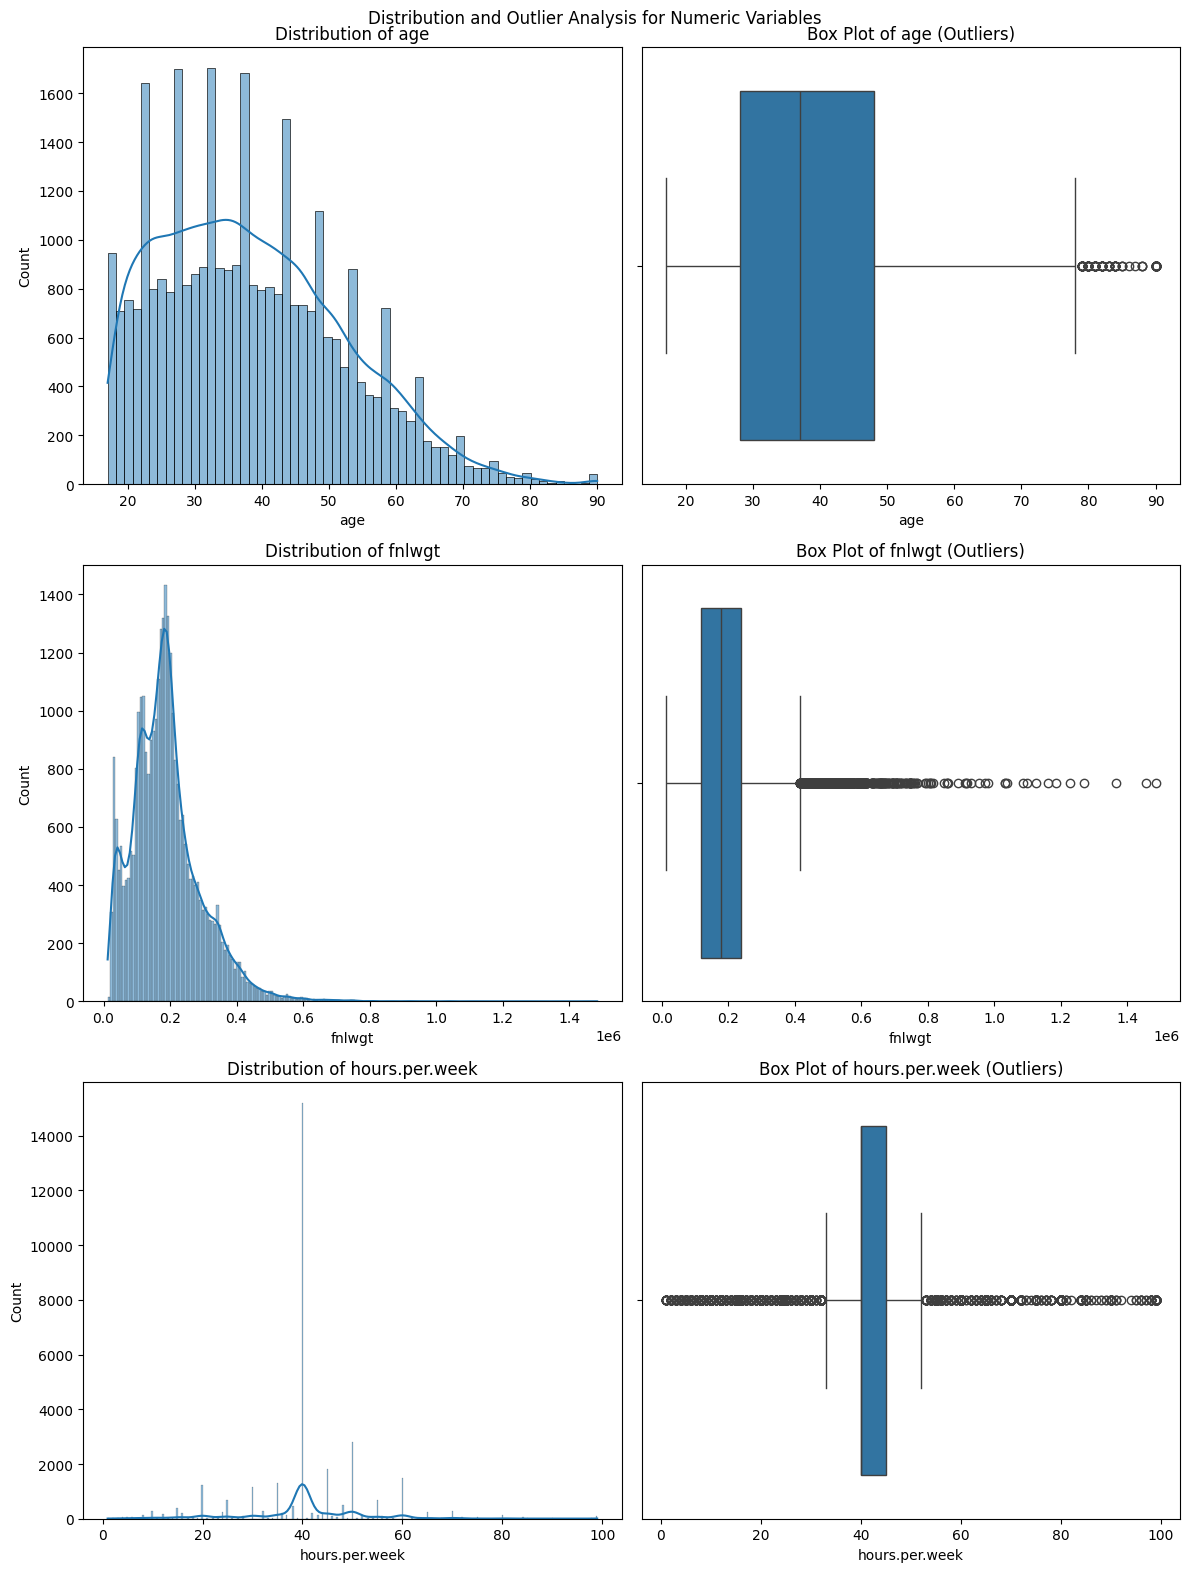

In [10]:
# Question 3:
# Distribution of Numeric Variables
print("Question 3: Distribution of Numeric Variables\n")

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
fig.suptitle('Distribution and Outlier Analysis for Numeric Variables')

# Plotting function
def plot_dist(col_name, ax_row):
    sns.histplot(cleaned_data[col_name], kde=True, ax=axes[ax_row, 0])
    axes[ax_row, 0].set_title(f'Distribution of {col_name}')
    sns.boxplot(x=cleaned_data[col_name], ax=axes[ax_row, 1])
    axes[ax_row, 1].set_title(f'Box Plot of {col_name} (Outliers)')

plot_dist('age', 0)
plot_dist('fnlwgt', 1)
plot_dist('hours.per.week', 2)
plt.tight_layout()
plt.show()

Question 4: Effect of Education on Income



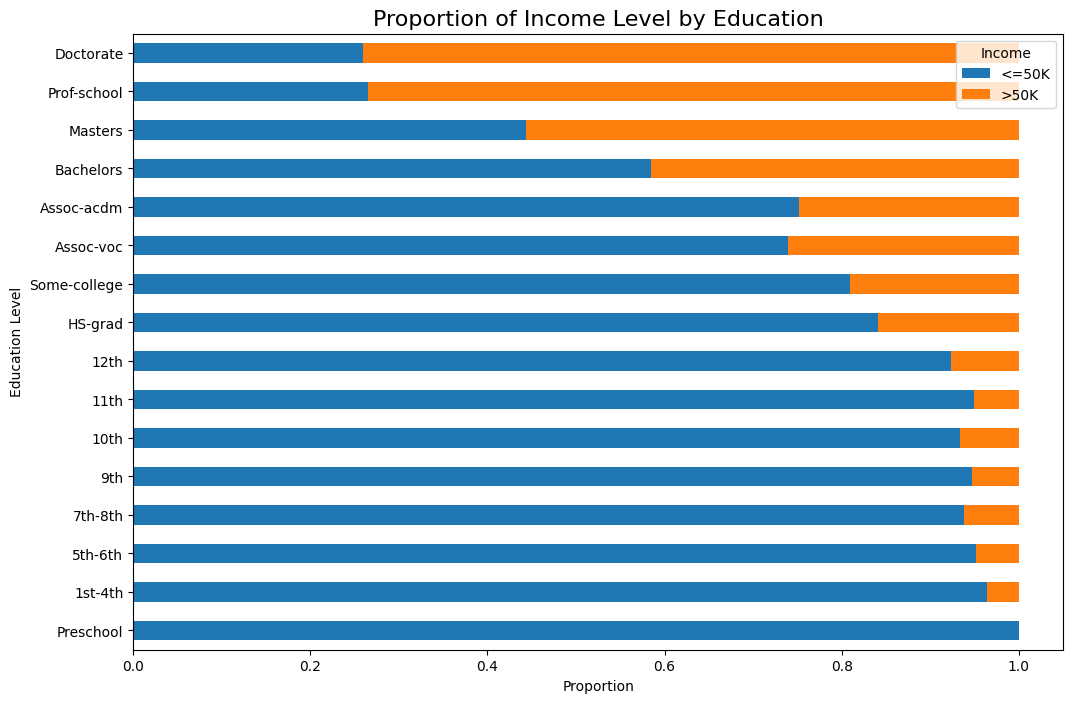

In [9]:
# Question 4:
# Effect of education on income
print("Question 4: Effect of Education on Income\n")

# Methodology: Use a normalized (100%) stacked bar chart
# Methodology: Visualize the proportion of >50K earners at each education level.
# We must sort the education levels correctly using 'education.num'.
education_order = cleaned_data.sort_values('education.num')['education'].unique()

# Create a normalized (percentage) stacked bar chart
edu_income_norm = cleaned_data.groupby('education')['income'].value_counts(normalize=True).unstack().loc[education_order]

edu_income_norm.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Proportion of Income Level by Education', fontsize=16)
plt.xlabel('Proportion')
plt.ylabel('Education Level')
plt.legend(title='Income')
plt.show()

Question 5: Correlation of Various Factors with income
Correlation (Age vs. Income): 0.2340


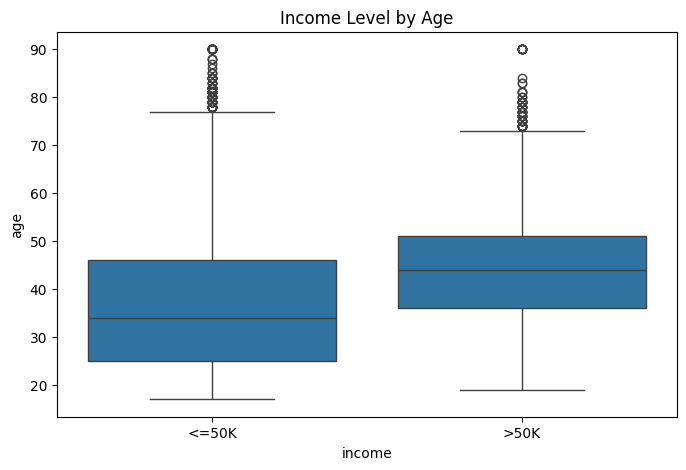


Correlation (Education.num vs. Income): 0.3353


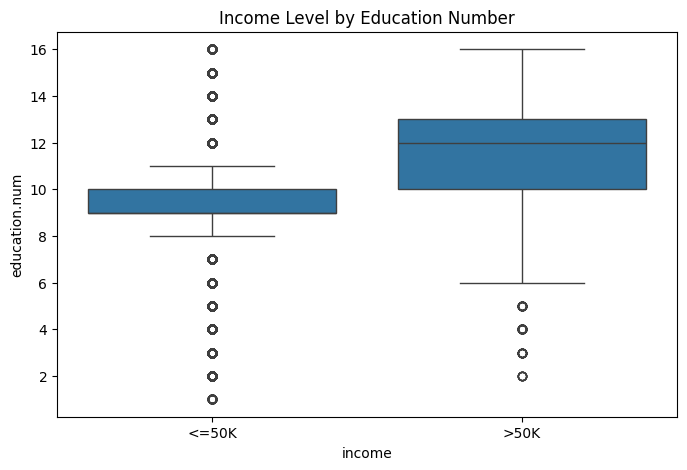


Association (Work class vs. Income):
Chi-Squared P-value: 3.352256069028484e-220


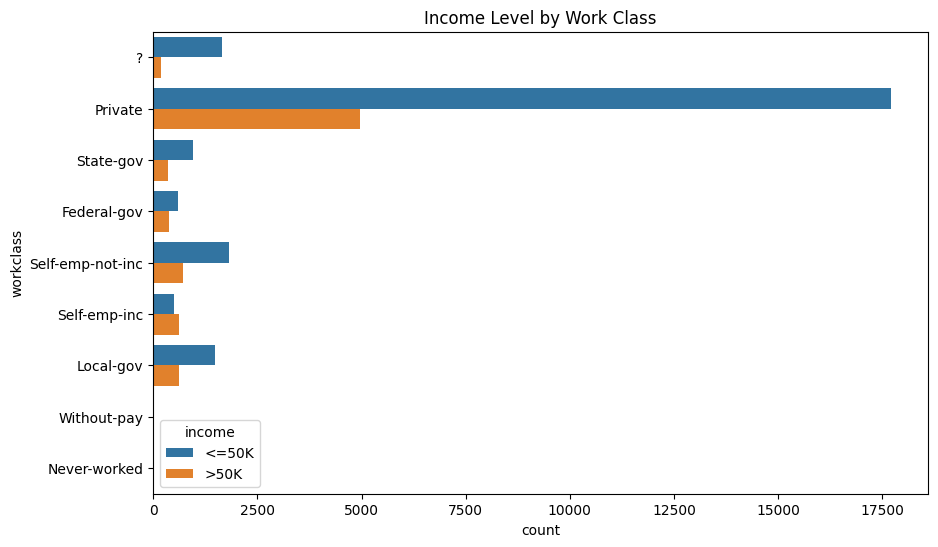


Association (Occupation vs. Income):
Chi-Squared P-value: 0.0


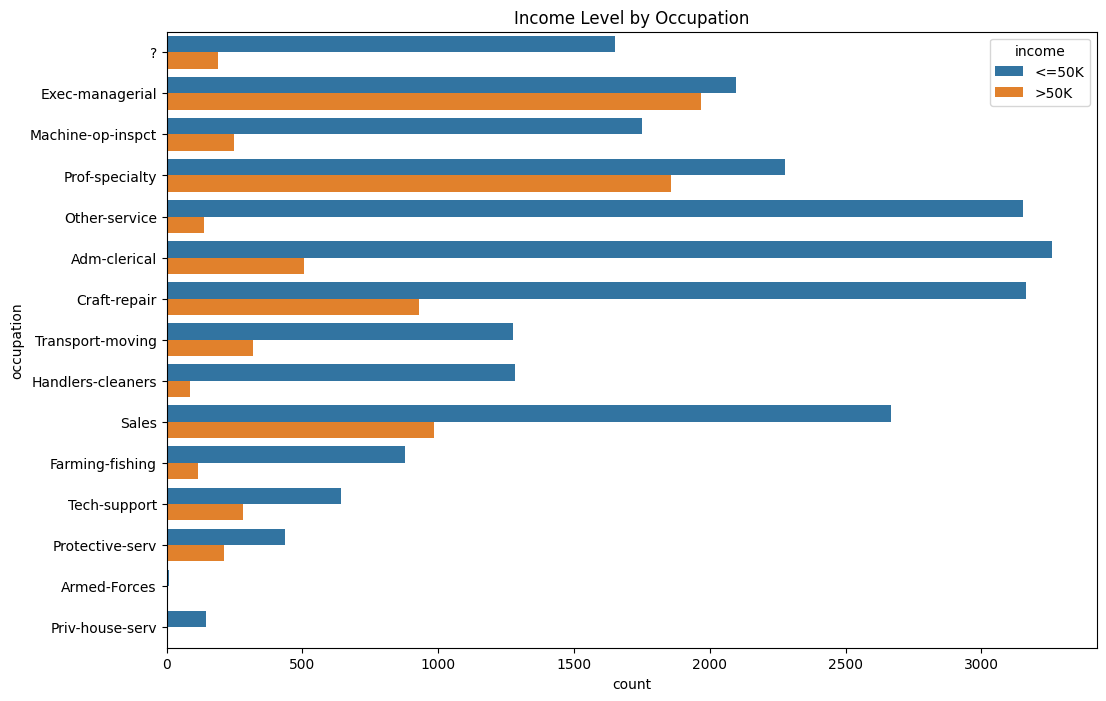

In [23]:
# Question 5:
# Correlation of (Age, Work class, Occupation, Education) with income
print("Question 5: Correlation of Various Factors with income")

# Create a binary income variable (0 for <=50K, 1 for >50K) for correlation
cleaned_data['income_binary'] = cleaned_data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 1. Age (Numerical) vs. Income
age_corr = cleaned_data['age'].corr(cleaned_data['income_binary'])
print(f"Correlation (Age vs. Income): {age_corr:.4f}")
plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_data, x='income', y='age')
plt.title('Income Level by Age')
plt.show()

# 2. Education (Numerical, using 'education.num') vs. Income
edu_corr = cleaned_data['education.num'].corr(cleaned_data['income_binary'])
print(f"\nCorrelation (Education.num vs. Income): {edu_corr:.4f}")
plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_data, x='income', y='education.num')
plt.title('Income Level by Education Number')
plt.show()

# 3. Work class (Categorical) vs. Income
print("\nAssociation (Work class vs. Income):")
table_wc = pd.crosstab(cleaned_data['workclass'], cleaned_data['income'])
chi2, p_val, _, _ = chi2_contingency(table_wc)
print(f"Chi-Squared P-value: {p_val}")
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, y='workclass', hue='income')
plt.title('Income Level by Work Class')
plt.show()

# 4. Occupation (Categorical) vs. Income
print("\nAssociation (Occupation vs. Income):")
table_occ = pd.crosstab(cleaned_data['occupation'], cleaned_data['income'])
chi2, p_val, _, _ = chi2_contingency(table_occ)
print(f"Chi-Squared P-value: {p_val}")
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, y='occupation', hue='income')
plt.title('Income Level by Occupation')
plt.show()

Question 6: Predictor for income (hours.per.week vs. relationship)
Correlation (Hours/Week vs. Income): 0.2297


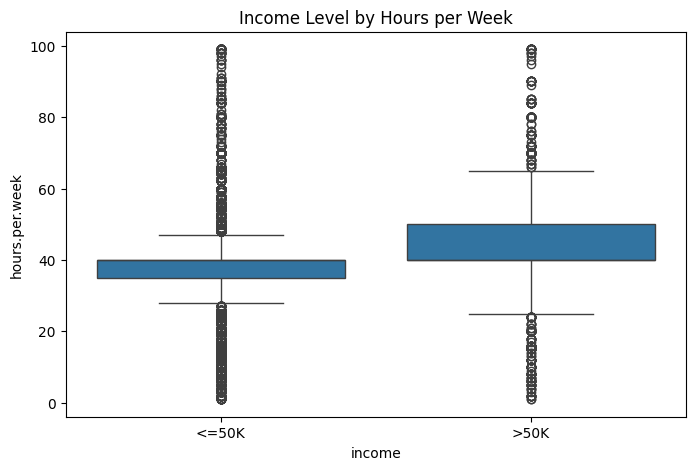


Analysis (Relationship vs. Income):


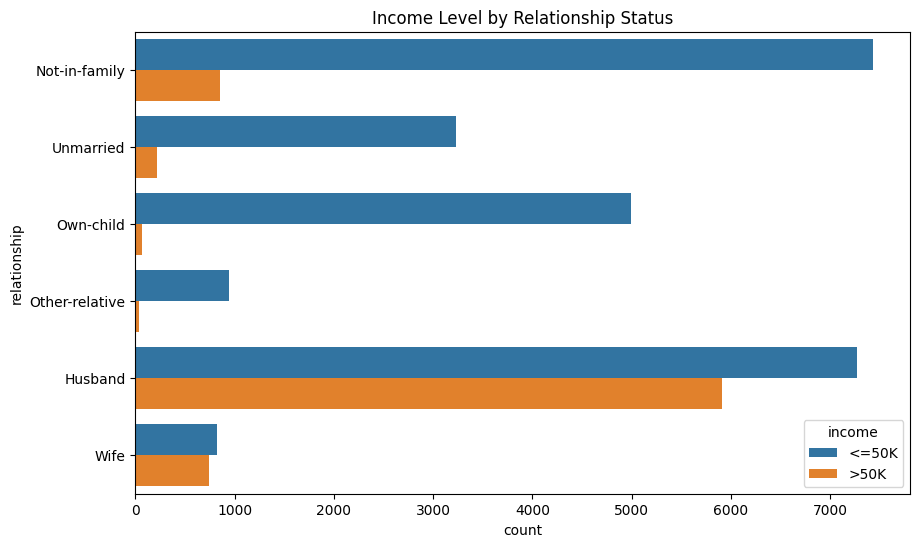

In [22]:
# Question 6:
# Predictor variable for income
print("Question 6: Predictor for income (hours.per.week vs. relationship)")

# 1. 'hours.per.week' (Numerical) vs. Income
hours_corr = cleaned_data['hours.per.week'].corr(cleaned_data['income_binary'])
print(f"Correlation (Hours/Week vs. Income): {hours_corr:.4f}")
plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_data, x='income', y='hours.per.week')
plt.title('Income Level by Hours per Week')
plt.show() # Display Q6 plot 1

# 2. 'relationship' (Categorical) vs. Income
print("\nAnalysis (Relationship vs. Income):")
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, y='relationship', hue='income')
plt.title('Income Level by Relationship Status')
plt.show()

In [14]:
# Question 7:
# Conditional Probability
print("Question 7: Probability(income > 50K | education.num <= 10)")

# 1. Filter for the condition (Denominator)
df_cond_edu = cleaned_data[cleaned_data['education.num'] <= 10]
total_edu_cases = len(df_cond_edu)

# 2. Find "success" cases (Numerator)
df_success_edu = df_cond_edu[df_cond_edu['income'] == '>50K']
total_success_cases = len(df_success_edu)

# 3. Calculate probability
if total_edu_cases > 0:
    prob_edu = total_success_cases / total_edu_cases
    print(f"Total individuals with education.num <= 10: {total_edu_cases}")
    print(f"Of those, individuals with income > 50K: {total_success_cases}")
    print(f"Probability: {total_success_cases} / {total_edu_cases} = {prob_edu:.4f} (or {prob_edu*100:.2f}%)")
else:
    print("No individuals found matching the condition.")

Question 7: Probability(income > 50K | education.num <= 10)
Total individuals with education.num <= 10: 22024
Of those, individuals with income > 50K: 3304
Probability: 3304 / 22024 = 0.1500 (or 15.00%)


Question 8: Association between fnlwgt and capital.loss
Pearson Correlation ('fnlwgt' vs. 'capital.loss'): -0.0103


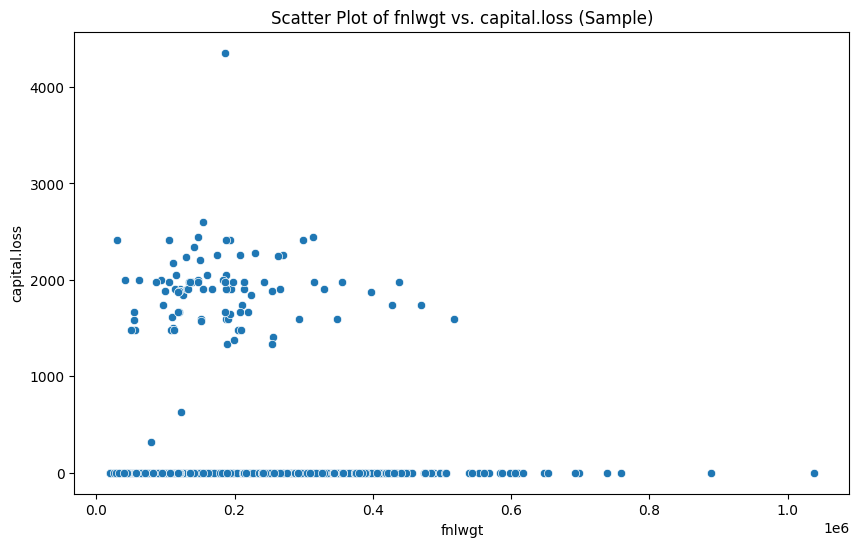

In [19]:
# Question 8:
# Association between fnlwgt and capital.loss
print("Question 8: Association between fnlwgt and capital.loss")

# Methodology: Both are numerical. Use Pearson correlation.
fnlwgt_caploss_corr = cleaned_data['fnlwgt'].corr(cleaned_data['capital.loss'])
print(f"Pearson Correlation ('fnlwgt' vs. 'capital.loss'): {fnlwgt_caploss_corr:.4f}")

plt.figure(figsize=(10, 6))
# Use a sample for the scatter plot to avoid overplotting
sample_df = cleaned_data.sample(n=2000, random_state=1)
sns.scatterplot(data=sample_df, x='fnlwgt', y='capital.loss')
plt.title('Scatter Plot of fnlwgt vs. capital.loss (Sample)')
plt.show()

In [21]:
# Question 9:
# Does race affect occupation?
print("Question 9: Does race affect occupation?")

# Methodology: Both are categorical. Use Chi-Squared test.
# H0: Race and Occupation are independent.
# H1: Race and Occupation are associated.
race_occ_table = pd.crosstab(cleaned_data['race'], cleaned_data['occupation'])
chi2, p_val, _, _ = chi2_contingency(race_occ_table)

print(f"Chi-Squared P-value: {p_val}")

Question 9: Does race affect occupation?
Chi-Squared P-value: 1.8107194295314885e-142


Question 10: Graphical Explanation of Income by Sex


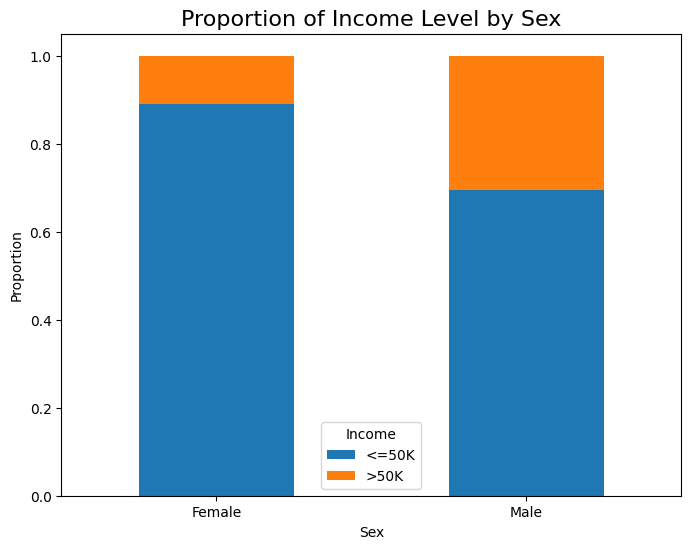

In [20]:
# Question 10:
# Males vs. Females Income (Graphical)
print("Question 10: Graphical Explanation of Income by Sex")

# Methodology: Use a normalized (100%) stacked bar chart to compare proportions.
sex_income_norm = cleaned_data.groupby('sex')['income'].value_counts(normalize=True).unstack()

sex_income_norm.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of Income Level by Sex', fontsize=16)
plt.ylabel('Proportion')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.show()
